In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/manue/OneDrive/Escritorio/Cleaned-Data.csv", sep=",")

In [3]:
# Cargar datos
iris = load_iris()
X, y = iris.data, iris.target

In [4]:
# Valores de la variable objetivo
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# Estadísticas descriptivas
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [6]:
# Distribución de clases
print(df.groupby(y).size())

0    50
1    50
2    50
dtype: int64


In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


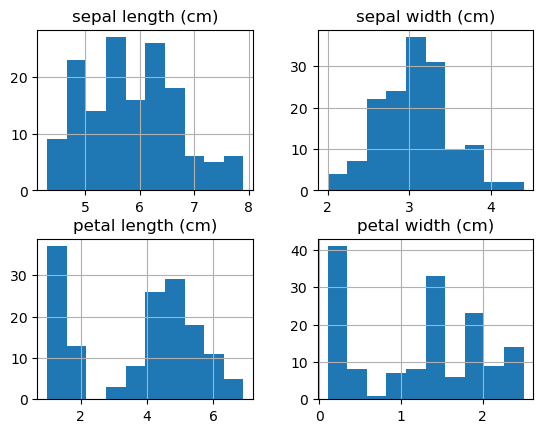

In [8]:
# Histogramas  
df.hist()
plt.show()

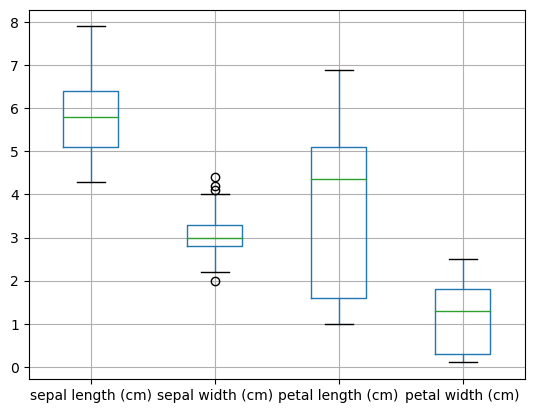

In [9]:
# Boxplots
df.boxplot()
plt.show()


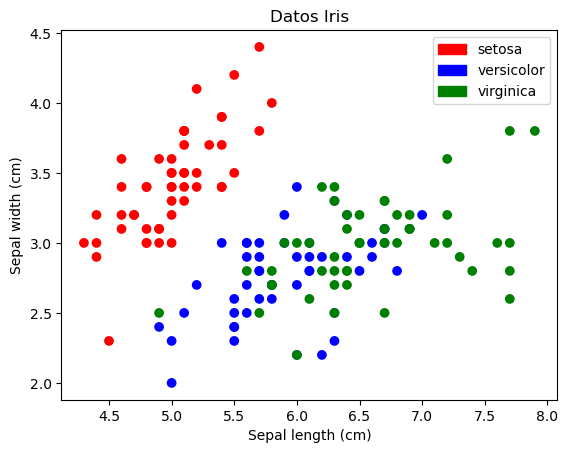

In [10]:
# Gráficas 
# Gráfica de dispersión 
#Vector de colores por valor de clase 
color_map = {0:'red', 1:'blue', 2:'green'} 
label_map = {0: 'setosa', 1: 'versicolor', 2:'virginica'}
colors = [color_map[c] for c in y]
plt.scatter(X[:,0], X[:,1], c=colors)
# Leyenda con mismos colores
handles = [mpatches.Patch(color=color_map[i], label=label_map[i]) 
            for i in range(len(label_map))]
plt.legend(handles=handles)
# Etiquetas
plt.xlabel('Sepal length (cm)')  
plt.ylabel('Sepal width (cm)')
plt.title('Datos Iris')
plt.show()

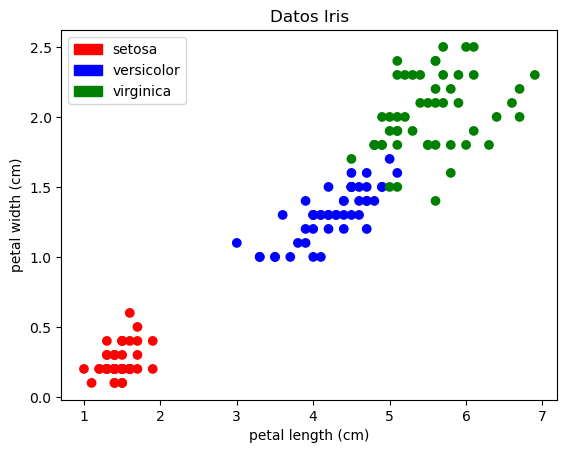

In [11]:
# Gráfica de dispersión 
#Vector de colores por valor de clase 
color_map = {0:'red', 1:'blue', 2:'green'} 
label_map = {0: 'setosa', 1: 'versicolor', 2:'virginica'}
colors = [color_map[c] for c in y]
plt.scatter(X[:,2], X[:,3], c=colors)
# Leyenda con mismos colores
handles = [mpatches.Patch(color=color_map[i], label=label_map[i]) 
            for i in range(len(label_map))]
plt.legend(handles=handles)
# Etiquetas
plt.xlabel('petal length (cm)')  
plt.ylabel('petal width (cm)')
plt.title('Datos Iris')
plt.show()

In [12]:
# Correlación
print(df.corr())


                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


In [13]:
# Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [14]:
# Entrenar modelo KNN con k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# Predicciones en test set
y_pred = knn.predict(X_test)

In [16]:

# Métricas de evaluación
print("Precisión:", accuracy_score(y_test, y_pred))

Precisión: 0.9111111111111111


In [17]:
# Matriz de confusión
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[14,  0,  0],
       [ 0, 15,  0],
       [ 0,  4, 12]], dtype=int64)

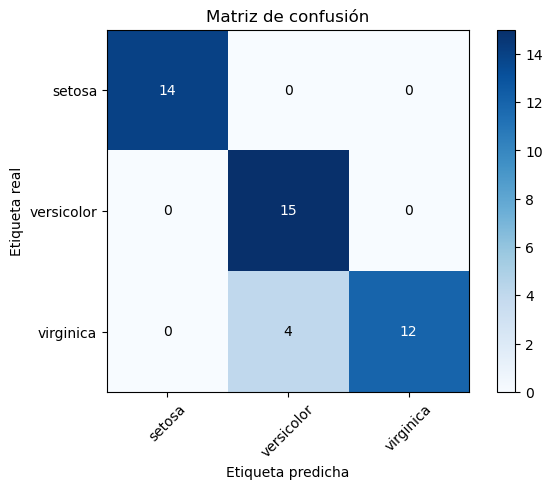

In [18]:
# Gráfica de matriz de confusión
plt.imshow(cf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de confusión')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)
# Colocar valores en las celdas
fmt = 'd' 
thresh = cf_matrix.max() / 2.
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        plt.text(j, i, format(cf_matrix[i, j], fmt), 
                 ha="center", va="center",
                 color="white" if cf_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha') 
plt.show()

Mejor k: {'n_neighbors': 5}


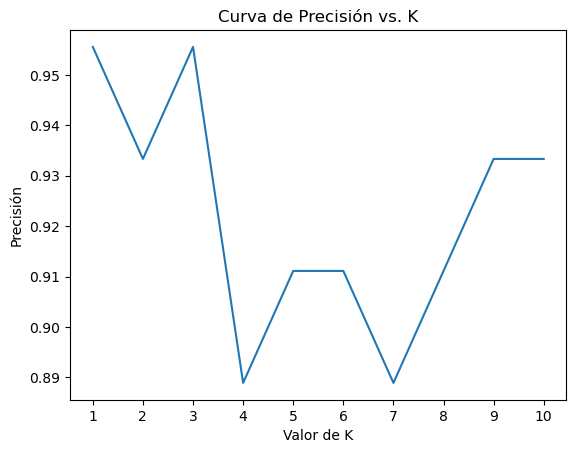

In [19]:
# Buscar mejor K con GridSearchCV
knn = KNeighborsClassifier()
k_range = range(1, 11)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Mejor k:", grid.best_params_)

# Curva de precisió vs K 
k_range = range(1, 11)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
x_axis = np.arange(1, 11, 1)
plt.xticks(x_axis)
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.title('Curva de Precisión vs. K')
plt.show()

In [20]:

# Entrenar con mejor k
knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
# Evaluación
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.79      1.00      0.88        15
           2       1.00      0.75      0.86        16

    accuracy                           0.91        45
   macro avg       0.93      0.92      0.91        45
weighted avg       0.93      0.91      0.91        45



In [21]:
# Métricas adicionales
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1 Score: {}".format(fscore))

Precision: 0.9444444444444444
Recall: 0.9333333333333333
F1 Score: 0.9329153605015673


In [23]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
